### Plotting all CCBOR data from John Stolz's group analyte by analyte

#### Separated sites (see other notebook for overlaid site plots)

In [1]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from scipy.stats import kde
from matplotlib import cm
import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [2]:
# read from csv 
biweek = pd.read_csv("/home/millieginty/Documents/git-repos/ccbor/data/biweekly/ccbor-biweekly-stolz.csv", parse_dates=['date'])

## Split the dataframe into site-specific dataframes

biweek1 = biweek[biweek['site'] == 1] # West Branch Alum Creek, upstream
biweek2 = biweek[biweek['site'] == 2] # West Branch Alum Creek, downstream 1
biweek3 = biweek[biweek['site'] == 3] # West Branch Alum Creek, downstream 2
biweek4 = biweek[biweek['site'] == 4] # Headwaters Alum Creek, upstream
biweek5 = biweek[biweek['site'] == 5] # Headwaters Alum Creek, downstream
biweek6 = biweek[biweek['site'] == 6] # Headwaters Alum Creek, intermediate 2
biweek7 = biweek[biweek['site'] == 7] # Headwaters Alum Creek, intermediate 1
biweek8 = biweek[biweek['site'] == 8] # Headwaters Big Walnut Creek, downstream
biweek9 = biweek[biweek['site'] == 9] # Little Walnut Creek, downstream

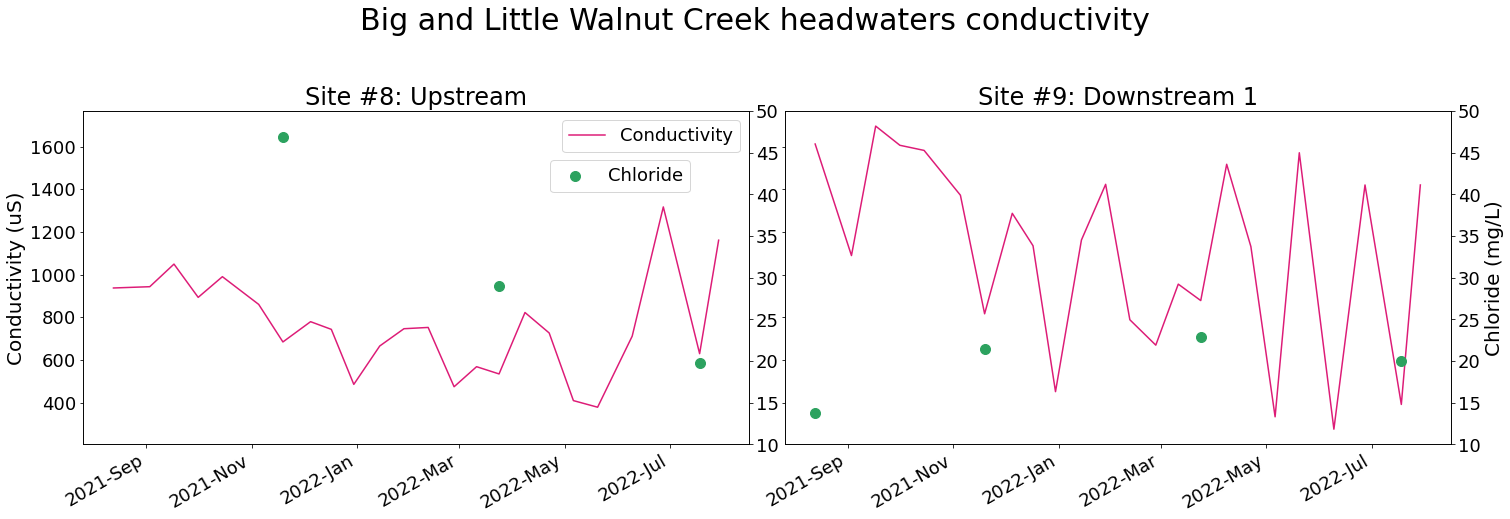

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5.5), sharey = True)
fig.suptitle('Big and Little Walnut Creek headwaters conductivity ', fontsize=30, y = 1.2)
fig.tight_layout(pad=2.08, w_pad=2)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

# Site 8
axes[0].plot(biweek8.date, biweek8.CCBOR_conductivity, c = '#dd1c77', label='Conductivity') 

ax0 = axes[0].twinx() # Add another y axis
ax0.set_ylim([10, 50]) # set y axis range
biweek8.plot.scatter(x="date", y="Chloride", ax=ax0, c = '#2ca25f', s = 100, label='Chloride') # Add in chloride
ax0.tick_params(axis='y', labelsize=18)
#ax0.set_ylabel('Chloride (mg/L)', size=MEDIUM_SIZE)
ax0.set_ylabel('')
ax0.legend(loc='upper right', bbox_to_anchor=(0.925, 0.88), fontsize = SMALL_SIZE)

axes[0].set_xticklabels(biweek8.date, rotation = 85, size=SMALL_SIZE)
axes[0].tick_params(axis='y', labelsize=18)
axes[0].set_ylabel('Conductivity (uS)', size=MEDIUM_SIZE)
axes[0].set_title('Site #8: Upstream', size=BIGGER_SIZE)
axes[0].legend(loc='upper right', fontsize = SMALL_SIZE)

axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[0].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

# Site 9
axes[1].plot(biweek9.date, biweek9.CCBOR_conductivity, c = '#dd1c77')

ax1 = axes[1].twinx() # Add another y axis
ax1.set_ylim([10, 50]) # set y axis range
biweek9.plot.scatter(x="date", y="Chloride", ax=ax1, c = '#2ca25f', s = 100) # Add in chloride
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylabel('Chloride (mg/L)', size=MEDIUM_SIZE)

axes[1].set_xticklabels(biweek9.date, rotation = 85, size=SMALL_SIZE)
axes[1].set_title('Site #9: Downstream 1', size=BIGGER_SIZE)


axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[1].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right');

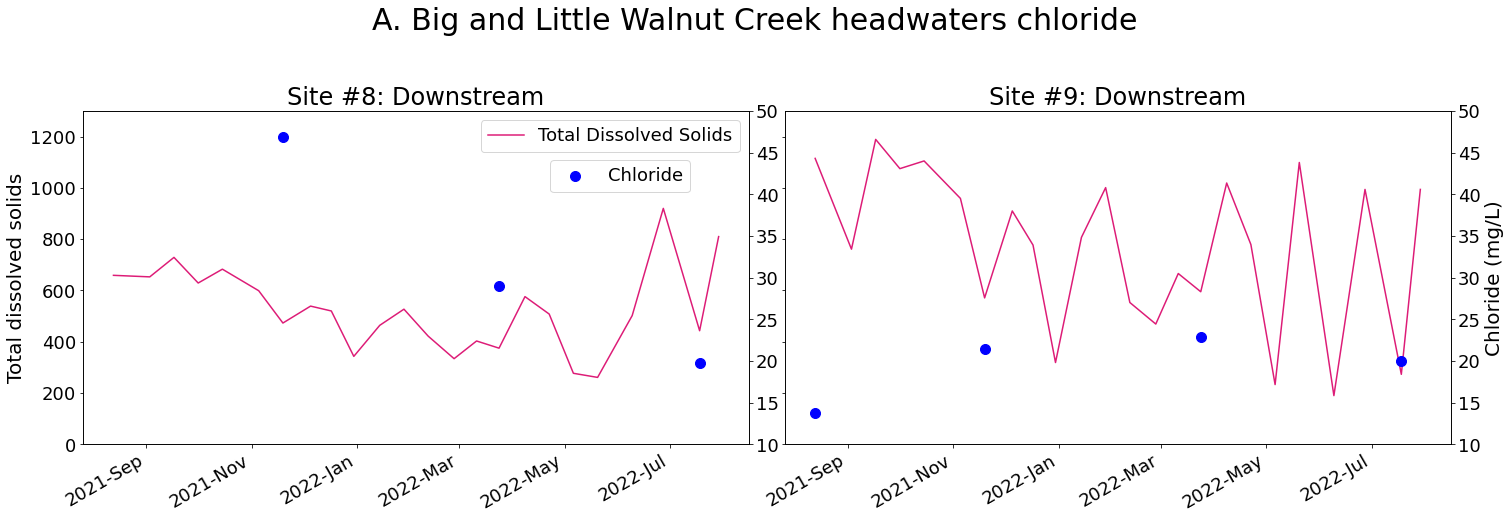

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5.5), sharey = True)
fig.suptitle('A. Big and Little Walnut Creek headwaters chloride ', fontsize=30, y = 1.2)
fig.tight_layout(pad=2.08, w_pad=2)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

# Site 8
axes[0].plot(biweek8.date, biweek8.CCBOR_TDS, c = '#dd1c77', label='Total Dissolved Solids') 

ax0 = axes[0].twinx() # Add another y axis
ax0.set_ylim([10, 50]) # set y axis range
biweek8.plot.scatter(x="date", y="Chloride", ax=ax0, c = 'Blue', s = 100, label='Chloride') # Add in chloride
ax0.tick_params(axis='y', labelsize=18)
#ax0.set_ylabel('Chloride (mg/L)', size=MEDIUM_SIZE)
ax0.set_ylabel('')
ax0.legend(loc='upper right', bbox_to_anchor=(0.925, 0.88), fontsize = SMALL_SIZE)

axes[0].set_xticklabels(biweek8.date, rotation = 85, size=SMALL_SIZE)
axes[0].set_ylim([0, 1300]) # set y axis range
axes[0].tick_params(axis='y', labelsize=18)
axes[0].set_ylabel('Total dissolved solids', size=MEDIUM_SIZE)
axes[0].set_title('Site #8: Downstream', size=BIGGER_SIZE)
axes[0].legend(loc='upper right', fontsize = SMALL_SIZE)

axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[0].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

# Site 9
axes[1].plot(biweek9.date, biweek9.CCBOR_TDS, c = '#dd1c77')

ax1 = axes[1].twinx() # Add another y axis
ax1.set_ylim([10, 50]) # set y axis range
biweek9.plot.scatter(x="date", y="Chloride", ax=ax1, c = 'Blue', s = 100) # Add in chloride
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylabel('Chloride (mg/L)', size=MEDIUM_SIZE)

axes[1].set_xticklabels(biweek9.date, rotation = 85, size=SMALL_SIZE)
axes[1].set_title('Site #9: Downstream', size=BIGGER_SIZE)

axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[1].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right');

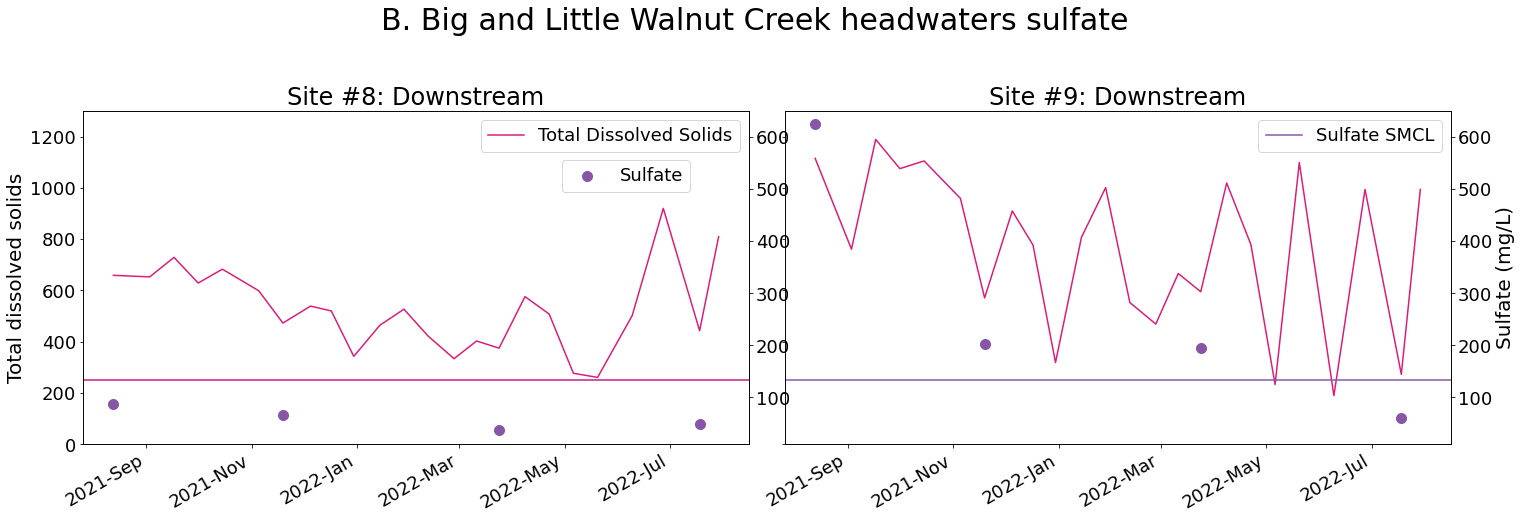

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5.5), sharey = True)
fig.suptitle('B. Big and Little Walnut Creek headwaters sulfate ', fontsize=30, y = 1.2)
fig.tight_layout(pad=2.08, w_pad=2)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

# Site 8
axes[0].plot(biweek8.date, biweek8.CCBOR_TDS, c = '#dd1c77', label='Total Dissolved Solids') 

ax0 = axes[0].twinx() # Add another y axis
ax0.set_ylim([10, 650]) # set y axis range
biweek8.plot.scatter(x="date", y="Sulfate", ax=ax0, c = '#8856a7', s = 100, label='Sulfate') # Add in Sulfate
ax0.tick_params(axis='y', labelsize=18)
#ax0.set_ylabel('Sulfate (mg/L)', size=MEDIUM_SIZE)
ax0.set_ylabel('')
ax0.legend(loc='upper right', bbox_to_anchor=(0.925, 0.88), fontsize = SMALL_SIZE)

axes[0].set_xticklabels(biweek8.date, rotation = 85, size=SMALL_SIZE)
axes[0].set_ylim([0, 1300]) # set y axis range
axes[0].tick_params(axis='y', labelsize=18)
axes[0].set_ylabel('Total dissolved solids', size=MEDIUM_SIZE)
axes[0].set_title('Site #8: Downstream', size=BIGGER_SIZE)
axes[0].legend(loc='upper right', fontsize = SMALL_SIZE)

axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[0].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
    
axes[0].axhline(y = 250, color = '#c51b8a', linestyle = '-', label='Sulfate limit')

# Site 9
axes[1].plot(biweek9.date, biweek9.CCBOR_TDS, c = '#dd1c77')

ax1 = axes[1].twinx() # Add another y axis
ax1.set_ylim([10, 650]) # set y axis range
biweek9.plot.scatter(x="date", y="Sulfate", ax=ax1, c = '#8856a7', s = 100) # Add in Sulfate
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylabel('Sulfate (mg/L)', size=MEDIUM_SIZE)

axes[1].set_xticklabels(biweek9.date, rotation = 85, size=SMALL_SIZE)
axes[1].set_title('Site #9: Downstream', size=BIGGER_SIZE)

axes[1].axhline(y = 250, color = '#8856a7', linestyle = '-', label='Sulfate SMCL')
axes[1].legend(loc='upper right', fontsize = SMALL_SIZE)


axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[1].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right');

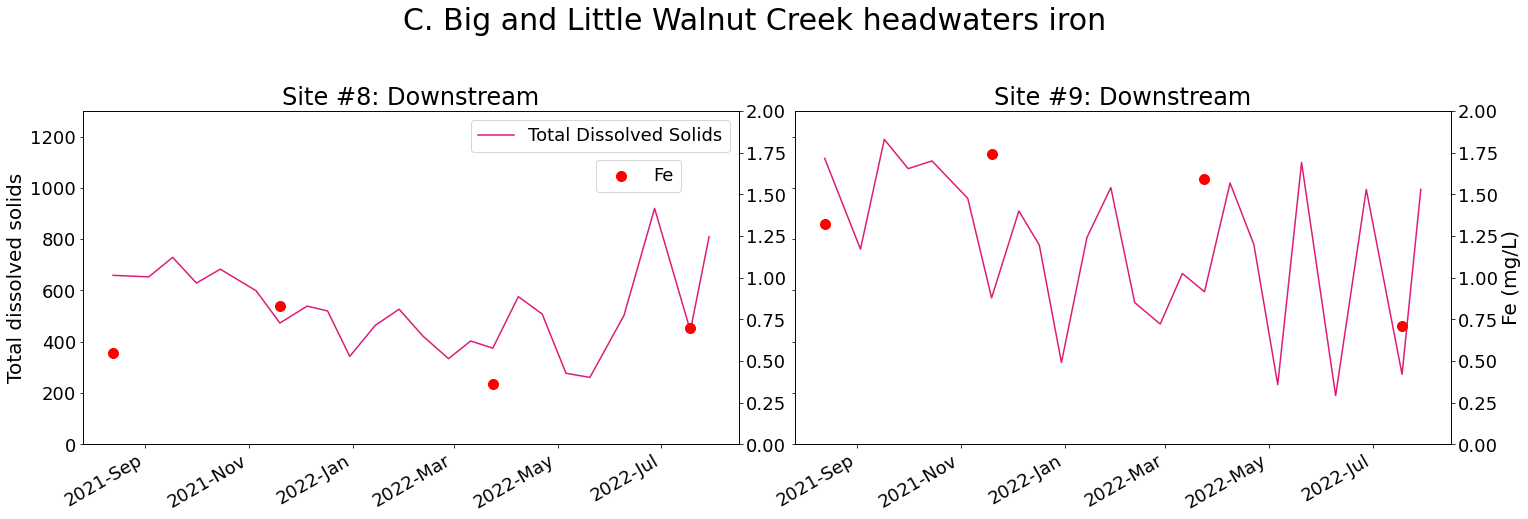

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5.5), sharey = True)
fig.suptitle('C. Big and Little Walnut Creek headwaters iron ', fontsize=30, y = 1.2)
fig.tight_layout(pad=2.08, w_pad=4)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

# Site 8
axes[0].plot(biweek8.date, biweek8.CCBOR_TDS, c = '#dd1c77', label='Total Dissolved Solids') 

ax0 = axes[0].twinx() # Add another y axis
ax0.set_ylim([0, 2]) # set y axis range
biweek8.plot.scatter(x="date", y="Fe", ax=ax0, c = 'Red', s = 100, label='Fe') # Add in Fe
ax0.tick_params(axis='y', labelsize=18)
#ax0.set_ylabel('Fe (mg/L)', size=MEDIUM_SIZE)
ax0.set_ylabel('')
ax0.legend(loc='upper right', bbox_to_anchor=(0.925, 0.88), fontsize = SMALL_SIZE)

axes[0].set_xticklabels(biweek8.date, rotation = 85, size=SMALL_SIZE)
axes[0].set_ylim([0, 1300]) # set y axis range
axes[0].tick_params(axis='y', labelsize=18)
axes[0].set_ylabel('Total dissolved solids', size=MEDIUM_SIZE)
axes[0].set_title('Site #8: Downstream', size=BIGGER_SIZE)
axes[0].legend(loc='upper right', fontsize = SMALL_SIZE)

axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[0].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

# Site 9
axes[1].plot(biweek9.date, biweek9.CCBOR_TDS, c = '#dd1c77')

ax1 = axes[1].twinx() # Add another y axis
ax1.set_ylim([0, 2]) # set y axis range
biweek9.plot.scatter(x="date", y="Fe", ax=ax1, c = 'Red', s = 100) # Add in Fe
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylabel('Fe (mg/L)', size=MEDIUM_SIZE)

axes[1].set_xticklabels(biweek9.date, rotation = 85, size=SMALL_SIZE)
axes[1].set_title('Site #9: Downstream', size=BIGGER_SIZE)


axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[1].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right');

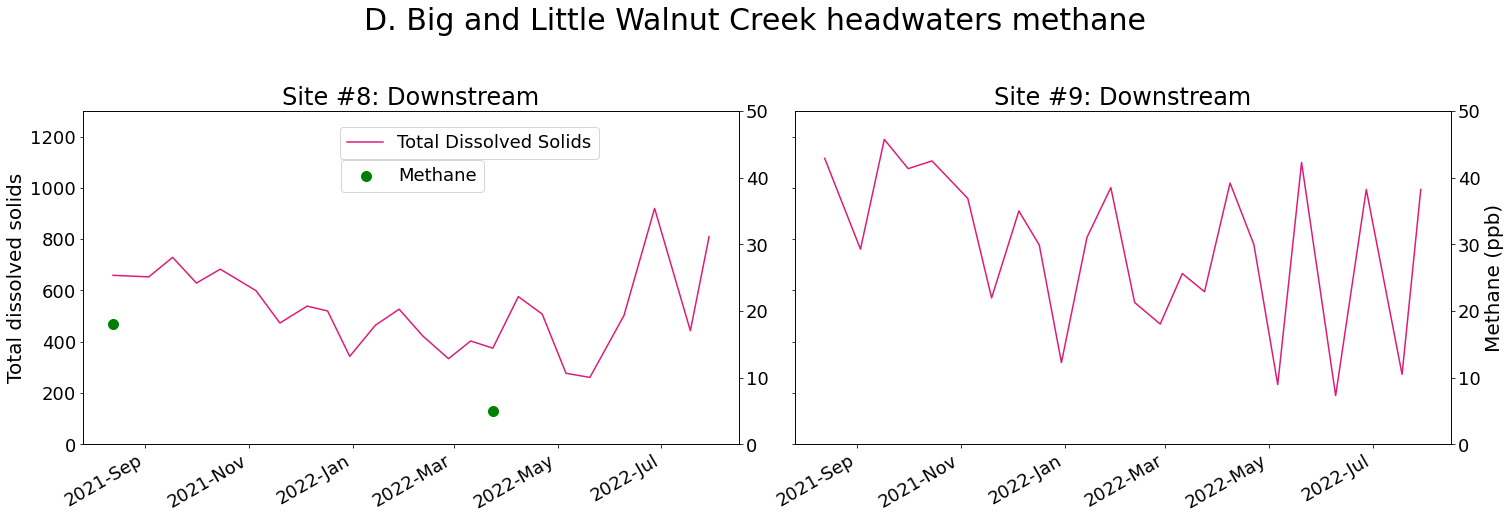

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5.5), sharey = True)
fig.suptitle('D. Big and Little Walnut Creek headwaters methane ', fontsize=30, y = 1.2)
fig.tight_layout(pad=2.08, w_pad=4)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

# Site 8
axes[0].plot(biweek8.date, biweek8.CCBOR_TDS, c = '#dd1c77', label='Total Dissolved Solids') 

ax0 = axes[0].twinx() # Add another y axis
ax0.set_ylim([0, 50]) # set y axis range
biweek8.plot.scatter(x="date", y="Methane (ppb)", ax=ax0, c = 'Green', s = 100, label='Methane') # Add in Methane
ax0.tick_params(axis='y', labelsize=18)
#ax0.set_ylabel('Methane (mg/L)', size=MEDIUM_SIZE)
ax0.set_ylabel('')
ax0.legend(loc='upper right', bbox_to_anchor=(0.625, 0.88), fontsize = SMALL_SIZE)

axes[0].set_xticklabels(biweek8.date, rotation = 85, size=SMALL_SIZE)
axes[0].set_ylim([0, 1300]) # set y axis range
axes[0].tick_params(axis='y', labelsize=18)
axes[0].set_ylabel('Total dissolved solids', size=MEDIUM_SIZE)
axes[0].set_title('Site #8: Downstream', size=BIGGER_SIZE)
axes[0].legend(loc='upper right', bbox_to_anchor=(0.8, 0.98), fontsize = SMALL_SIZE)

axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[0].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

# Site 9
axes[1].plot(biweek9.date, biweek9.CCBOR_TDS, c = '#dd1c77')

ax1 = axes[1].twinx() # Add another y axis
ax1.set_ylim([0, 50]) # set y axis range
#biweek9.plot.scatter(x="date", y="Methane (ppb)", ax=ax1, c = 'Green', s = 100) # Add in Methane
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylabel('Methane (ppb)', size=MEDIUM_SIZE)

axes[1].set_xticklabels(biweek9.date, rotation = 85, size=SMALL_SIZE)
axes[1].set_title('Site #9: Downstream', size=BIGGER_SIZE)

axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[1].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right');